In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:

import splitfolders

# Define the input folder containing subfolders for each class
input_folder = "Soursop"  # Replace with your dataset folder

# Split the dataset into train (70%), val (20%), test (10%)
splitfolders.ratio(
    input_folder, 
    output="soursopLeavesdatasets",  # Destination folder
    seed=42, 
    ratio=(0.7, 0.2, 0.1), 
    group_prefix=None,  # Keeps images from the same class together
    move=False  # Set to True to move files instead of copying
)



Copying files: 3838 files [00:06, 625.11 files/s]


In [3]:
##import tensorflow as tf  ## this to know the version of Tensorflow
print(tf.__version__)

tf.config.run_functions_eagerly(True) ##If using TensorFlow 2.x, ensure eager execution is enabled

2.18.0


In [13]:
##Training Image Preprocessing

In [4]:
IMAGE_SIZE = 256
CHANNELS = 3
BATCH_SIZE = 32

In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'soursopLeavesdatasets/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 2684 files belonging to 6 classes.


In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'soursopLeavesdatasets/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 766 files belonging to 6 classes.


In [8]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [9]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [10]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[236.5       233.5       218.5      ]
   [237.63281   234.63281   219.63281  ]
   [236.16797   233.16797   218.16797  ]
   ...
   [232.125     228.125     216.125    ]
   [232.21875   228.21875   216.21875  ]
   [233.125     229.125     217.125    ]]

  [[231.875     228.875     213.875    ]
   [235.27344   232.27344   217.27344  ]
   [234.78125   231.78125   216.78125  ]
   ...
   [226.0586    222.0586    210.0586   ]
   [226.5039    222.5039    210.5039   ]
   [227.75      223.75      211.75     ]]

  [[230.625     227.625     212.625    ]
   [235.15625   232.15625   217.15625  ]
   [233.72656   230.72656   215.72656  ]
   ...
   [228.03125   224.03125   212.03125  ]
   [229.0625    225.0625    213.0625   ]
   [230.875     226.875     214.875    ]]

  ...

  [[172.375     169.375     154.375    ]
   [173.50781   170.50781   155.50781  ]
   [174.36328   171.36328   156.36328  ]
   ...
   [217.5       213.5       201.5      ]
   [217.57031   213.57031   201.57031  ]
   [2

In [20]:
##class name

In [12]:
train_generator.class_indices

NameError: name 'train_generator' is not defined

In [25]:
class_names = list(train_generator.class_indices.keys())
class_names

['CuttingCaterpillar',
 'CuttingWeevil',
 'DieBack',
 'Healthy',
 'WhiteFly',
 'Yellow']

In [49]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [50]:
model = Sequential()

In [23]:
##Building Convulution Layer

In [51]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [52]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [53]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [54]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [55]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [56]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [57]:
model.add(Flatten())

In [58]:
model.add(Dense(units=1500,activation='relu'))

In [59]:
model.add(Dropout(0.4))

In [60]:
#Output Layer
model.add(Dense(units=6,activation='softmax'))

In [66]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [67]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 254, 254, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 127, 127, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 125, 125, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 62, 62, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 60, 60, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 30, 30, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 28, 28, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 14, 14, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1500)                │      27,649,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │           9,006 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,370,730 (123.48 MB)

 Trainable params: 32,370,730 (123.48 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [73]:
training_set = training_set.apply(tf.data.experimental.ignore_errors())
validation_set = validation_set.apply(tf.data.experimental.ignore_errors())


In [75]:
import tensorflow as tf
from tensorflow.keras import backend as K

K.clear_session()


In [76]:
history = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=20
)


Epoch 1/20
     84/Unknown 238s 3s/step - accuracy: 0.2712 - loss: 4.0599

D:\MinicondaFolda\envs\zdata\Lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


84/84 ━━━━━━━━━━━━━━━━━━━━ 249s 3s/step - accuracy: 0.2729 - loss: 4.0351 - val_accuracy: 0.7180 - val_loss: 0.7443
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.7242 - loss: 0.7377 - val_accuracy: 0.9086 - val_loss: 0.2541
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.9006 - loss: 0.2990 - val_accuracy: 0.9817 - val_loss: 0.0681
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 213s 3s/step - accuracy: 0.8905 - loss: 0.3645 - val_accuracy: 0.9648 - val_loss: 0.1196
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 213s 3s/step - accuracy: 0.9669 - loss: 0.1067 - val_accuracy: 0.9817 - val_loss: 0.0636
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.9270 - loss: 0.2427 - val_accuracy: 0.9674 - val_loss: 0.1925
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.9504 - loss: 0.1669 - val_accuracy: 0.9791 - val_loss: 0.0627
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.9841 - loss: 0.0584 - val_accuracy: 0.9883 - val_loss: 0.

In [77]:

#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

84/84 ━━━━━━━━━━━━━━━━━━━━ 40s 475ms/step - accuracy: 0.9962 - loss: 0.0107


In [78]:
print(train_loss,train_acc)

0.011453250423073769 0.9959016442298889


In [79]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 483ms/step - accuracy: 0.9909 - loss: 0.0240


In [80]:
print(val_loss,val_acc)

0.033265408128499985 0.9869451522827148


In [81]:
model.save("trained_model.keras") ## more small MB will be consume

In [87]:
model.save("trained_model.h5") ## big MB will be consume

In [89]:
history.history

{'accuracy': [0.41579732298851013,
  0.7753353118896484,
  0.9269746541976929,
  0.9232488870620728,
  0.9728018045425415,
  0.943368136882782,
  0.9642325043678284,
  0.9839791059494019,
  0.9877049326896667,
  0.8930700421333313,
  0.9783904552459717,
  0.9839791059494019,
  0.9858420491218567,
  0.997391939163208,
  0.9757823944091797,
  0.9821162223815918,
  0.999627411365509,
  0.9903129935264587,
  0.9739195108413696,
  0.992548406124115],
 'loss': [1.9527922868728638,
  0.6291307210922241,
  0.22490961849689484,
  0.24345315992832184,
  0.095970518887043,
  0.19206614792346954,
  0.11803699284791946,
  0.06291303783655167,
  0.047029659152030945,
  0.37906113266944885,
  0.06260275840759277,
  0.05683112144470215,
  0.049816638231277466,
  0.01584433577954769,
  0.08629225939512253,
  0.05441752076148987,
  0.0038657099939882755,
  0.028563117608428,
  0.09229687601327896,
  0.028068380430340767],
 'val_accuracy': [0.7180156707763672,
  0.9086161851882935,
  0.9817232489585876,


In [90]:
##Record Model History in jason format

In [91]:
import json
with open("training_hist.json","w") as f:
    json.dump(history.history,f)

In [92]:
history.history['val_accuracy']

[0.7180156707763672,
 0.9086161851882935,
 0.9817232489585876,
 0.9647519588470459,
 0.9817232489585876,
 0.9673629403114319,
 0.9791122674942017,
 0.9882506728172302,
 0.9268929362297058,
 0.9738903641700745,
 0.9921671152114868,
 0.9699738621711731,
 0.9908615946769714,
 0.9895561337471008,
 0.9843342304229736,
 0.9921671152114868,
 0.9947780966758728,
 0.9843342304229736,
 0.9869451522827148,
 0.9869451522827148]

In [93]:
### Accuracy Visualization

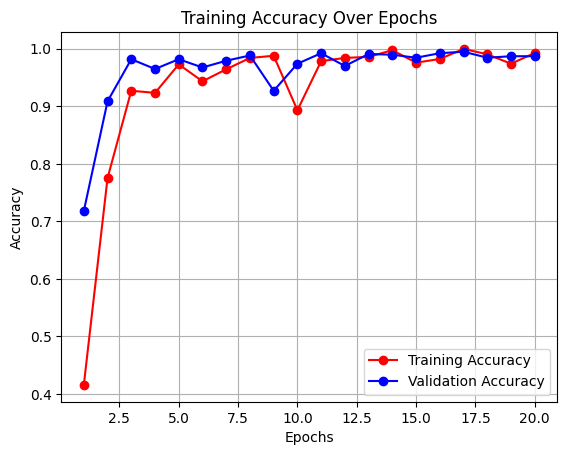

In [99]:
import matplotlib.pyplot as plt

# Dynamically adjust epochs list based on history length
epochs = list(range(1, len(history.history['accuracy']) + 1))

plt.plot(epochs, history.history['accuracy'], color='red', marker='o', linestyle='-', label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'],color='blue',marker='o', linestyle='-',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [104]:
### some Other metrics to evaluate the model

In [114]:
train_set = tf.keras.preprocessing.image_dataset_from_directory("soursopdatasets/val")
class_names = train_set.class_names  # Get class names BEFORE transformations

print(class_names)


Found 766 files belonging to 6 classes.
['CuttingCaterpillar', 'CuttingWeevil', 'DieBack', 'Healthy', 'WhiteFly', 'Yellow']


In [117]:
y_pred = model.predict(train_set)
y_pred,y_pred.shape

24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 509ms/step


(array([[2.2386330e-06, 8.1295126e-10, 2.2743994e-07, 2.0159198e-12,
         6.6119324e-14, 9.9999750e-01],
        [1.3610166e-14, 1.7623231e-12, 1.1811909e-15, 2.7939541e-16,
         1.0000000e+00, 2.5540109e-13],
        [1.9836495e-08, 3.9532652e-12, 1.7267829e-13, 1.0000000e+00,
         1.6920480e-16, 1.1967710e-10],
        ...,
        [9.1492930e-06, 8.9548183e-07, 6.9731393e-19, 9.9998987e-01,
         9.6899858e-15, 2.0832005e-11],
        [1.9445898e-07, 1.7504778e-08, 9.9966657e-01, 6.0834219e-07,
         3.2271602e-04, 9.8524106e-06],
        [2.1688067e-05, 1.7706550e-11, 5.8556705e-17, 9.9997830e-01,
         9.1794392e-15, 5.4944569e-09]], dtype=float32),
 (766, 6))

In [120]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'soursopdatasets/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 766 files belonging to 6 classes.


In [121]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 489ms/step


(array([[9.99999523e-01, 3.79980505e-14, 1.22483063e-18, 4.34975391e-07,
         8.22419444e-18, 1.15500449e-10],
        [9.99999881e-01, 4.66766869e-17, 3.28275932e-19, 1.08259513e-07,
         1.37949432e-21, 8.44966864e-14],
        [9.99999523e-01, 3.31697357e-14, 7.30855430e-19, 5.31901094e-07,
         8.50395230e-19, 4.80296081e-11],
        ...,
        [3.67434416e-03, 1.07558026e-05, 2.32392267e-07, 1.13310804e-07,
         9.43266265e-09, 9.96314466e-01],
        [6.97982784e-07, 2.00927408e-09, 1.89392751e-10, 6.49630360e-13,
         6.94501694e-14, 9.99999285e-01],
        [7.60910979e-08, 5.67470071e-10, 8.66179836e-11, 2.37708345e-13,
         4.54976985e-13, 9.99999881e-01]], dtype=float32),
 (766, 6))

In [122]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [123]:
predicted_categories

<tf.Tensor: shape=(766,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 5, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
     

In [124]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(766, 6), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)>

In [125]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(766,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
     

In [126]:
from sklearn.metrics import classification_report,confusion_matrix

In [130]:
print(Y_true.shape, predicted_categories.shape)

(766,) (766,)


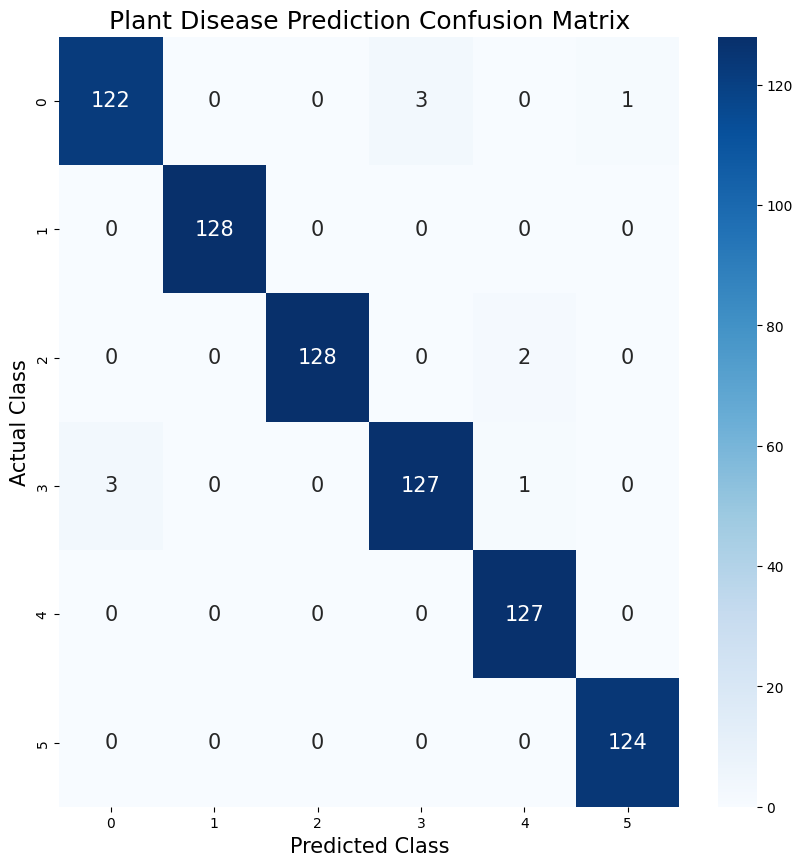

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(Y_true, predicted_categories)

# Plot using seaborn
plt.figure(figsize=(10, 10))  # Adjust size if needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 15})

# Labels and title
plt.xlabel("Predicted Class", fontsize=15)
plt.ylabel("Actual Class", fontsize=15)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=18)

plt.show()

In [138]:
### load , convert and save TF model

In [135]:
model = tf.keras.models.load_model("trained_model.keras")

In [136]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\dandy\AppData\Local\Temp\tmpcbfx2cm2\assets


INFO:tensorflow:Assets written to: C:\Users\dandy\AppData\Local\Temp\tmpcbfx2cm2\assets


Saved artifact at 'C:\Users\dandy\AppData\Local\Temp\tmpcbfx2cm2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  2935374829648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2935374830416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2935374830992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2935374831568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2935374830800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2935374832336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2935374831760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2935374833104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2935374825808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2935374833296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2935

In [137]:
# Save the model as a .tflite file
with open("model.tflite", "wb") as f:
    f.write(tflite_model)